# Mnist classification

### Exercise objectives
- Implement a CNN architecture with convolution layers
- Run a Neural Network on images

<hr>
<hr>

Let's imagine for a moment that you are working for the postal office (and you're in 1970 / 1980). You deal everyday with a enourmous amont of letters, and you want to automate the process of reading the numbers that have been handwritten. This task, called the _Handwriting Recognition_, has been a very complex that has been handled by Bell Labs (among other) where Yann Le Cun used to work, and where such things have been developed : 

![Number recognition](recognition.gif)


The idea is that you have an image (not a video: the animation is here to present what happens with different images) as an input and you try to predict the figure on the image - it corresponds to a classification task, where the output is the class (=figure) the image belongs to, from 0 to 9.

This task used to be quite complex back in the time, and still is a benchmark on which a lot of people work. For this reason, the MNIST (for *Modified ou Mixed National Institute of Standards and Technology*) dataset has been created: it corresponds to digit images, from 0 to 9. 

You goal in this notebook is to build a Convolution Neural Network that can work on such images and predict the corresponding class of each digit image. Keep in mind that this CNN will make you classify hand-written digits, which was a very complex task till the 90's. 

## The data

Keras provides multiple datasets within the Python package. You can load it with the following commands:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.datasets import mnist
df = mnist.load_data()

In [5]:
from tensorflow.keras import datasets
data = datasets.mnist.load_data(path="mnist.npz")
(X_train, y_train), (X_test, y_test) = data

In [ ]:
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# create and configure the data generator
datagen = ImageDataGenerator(data)
datagen

❓ Question ❓ Let's look at some of the data. 

Select some of the values of the train set and plot them thanks to the `imshow` function from matplotlib with `cmap` set to `gray`(otherwise, the displayed colors are just some arrangement Matplotlib does, which does not exist in practice).

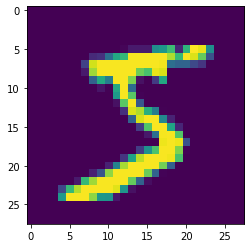

In [7]:
plt.imshow(X_train[0])

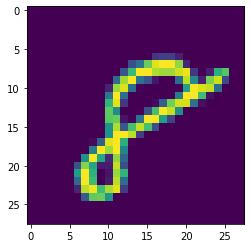

In [8]:
plt.imshow(X_train[-1])

Remember that neural networks converge faster when the input data are somehow normalized? It goes similarly for input images. 

❓ Question ❓ As a first preprocessing step, you should normalize your data. For images, it simply implies to divide your input data by the maximal value, i.e. 255. Don't forget to do it on your train and test data.

(N.B.: you can also centered your data, by substracting 0.5 but it is not mandatory). 

In [9]:
X_train[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [10]:
# YOUR CODE HERE
X_train_normalise = X_train/255.0
X_test_normalise = X_test/255.0

In [11]:
X_train_normalise[0:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

❓ Question ❓ What is the shape of your images?

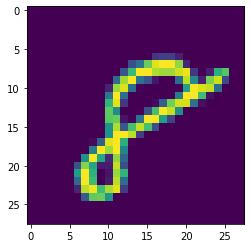

In [12]:
# YOUR CODE HERE
plt.imshow(X_train_normalise[-1])

You see that you have 60.000 training images, all of size (28, 28). However, Keras needs images whose last dimension is the number of channels, which is missing here.

❓ Question ❓ Use the `expand_dims` to add one dimension at the end of the training and test data. Then, print the shape of X_train and X_test that should respectively be (60000, 28, 28, 1) and (10000, 28, 28, 1).

In [14]:
N = X_train.shape[0]
print(" 60 000 données  :", N)
X_train = np.reshape(X_train, (N, 28,28,1))
X_test = np.reshape(X_test, (X_test.shape[0],28,28,1))

 60 000 données  : 60000


In [15]:
#Partie A 
X_train = np.reshape(X_train, (N, 28,28,1))
X_test = np.reshape(X_test, (X_test.shape[0],28,28,1))
#normalisation
X_train_n = X_train/255
X_test_n = X_test/255
#On a 10 cathegorie des nombres
y_train_ca = to_categorical(y_train, num_classes=10)
y_test_ca = to_categorical(y_test, num_classes=10)

In [16]:
#Partie B Reseau de neurones
modele = Sequential()
#Premier couche de convolution: 32 neurones(nbre de filtre), convolution 3*3(precise la taille du conv), activation 
modele.add(Conv2D(32, kernel_size=3, padding= 'same', activation='relu'))
#Deuxieme couche de convolution 16 neurones
modele.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
#Aplatissage
modele.add(Flatten())
#couche de sortie : 10 neurones
modele.add(Dense(10, activation='softmax'))
#descente de gradiant: type d'erreur "loss" , methede de gradiant tre efficace "adam"
modele.compile(optimizer= 'adam',loss='categorical_crossentrepy', metrics=['categorical_crossentropy'])

#modele.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
modele.build(input_shape = (N, 28, 28, 1))
modele.summary()
#On a totale 130.394 poids à calcules

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (60000, 28, 28, 32)       320       
                                                                 
 conv2d_1 (Conv2D)           (60000, 28, 28, 16)       4624      
                                                                 
 flatten (Flatten)           (60000, 12544)            0         
                                                                 
 dense (Dense)               (60000, 10)               125450    
                                                                 
Total params: 130,394
Trainable params: 130,394
Non-trainable params: 0
_________________________________________________________________


#calcul des poids: On va lance en utilisant une descente de gradiant par lot de taille 32
modele.fit(X_train_n, y_train_ca, batch_size=32, epochs=5)
#Partie C : Evalue la qualite des reseau obtenu n'on pas sur nos données d'apprentissage plutot donne independantes
score = modele.evaluate(X_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

In [18]:
X_train_normalise_elargi = np.expand_dims(X_train_normalise,axis=3)
X_test_normalise_elargi = np.expand_dims(X_test_normalise,axis=3)
print("X_train_normalise          :",X_train_normalise.shape)
print("X_train_normalise_elargi   :",X_train_normalise_elargi.shape)
print("X_test_normalise           :",X_test_normalise.shape)
print("X_test_normalise_elargi    :",X_test_normalise_elargi.shape)
#60000, 28, 28, 1 : code avec 28*28 avec un seul canal d'entre 1

X_train_normalise          : (60000, 28, 28)
X_train_normalise_elargi   : (60000, 28, 28, 1)
X_test_normalise           : (10000, 28, 28)
X_test_normalise_elargi    : (10000, 28, 28, 1)


A last thing to do to prepare your data is to convert your labels to one-hot encoded categories.

❓ Question ❓ Use `to_categorical` to transform your labels. Store the results in `y_train_cat` and `y_test_cat`.

In [19]:
# YOUR CODE HERE
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype='float32')
y_test_cat = tf.keras.utils.to_categorical( y_test, num_classes=None, dtype='float32')
#On a 10 cathegorie des nombres
print("y_train_cat :",y_train_cat.shape)
print("y_test_cat :",y_test_cat.shape)

y_train_cat : (60000, 10)
y_test_cat : (10000, 10)


The data are now ready to be used.

## The Convolutional Neural Network _aka_ CNN

Now, build a Convolutional Neural Network. 

❓ Question ❓ Based on the course, build a neural network that has:
- a `Conv2D` layer with 8 filters, each of size (4, 4), with an input shape suitable for your task, the relu activation function, and padding='same' so as to 
- a `MaxPool2D` layer with a pool_size of (2, 2)
- a second `Conv2D` layer with 16 filters, each of size (3, 3), and the relu activation function
- a second `MaxPool2D` layer with a pool_size of (2, 2)
- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the relu activation function
- a last layer that is suited for your task

In the function, do not forget to include the compilation of the model, which optimizes the `categorical_crossentropy` with the adam optimizer - and the accuracy should be among the metrics.

❓ Question ❓ How many trainable parameters are there in your model?
- Compute them with `model.summary()` first
- Recompute them manually layer per layer then

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():
    model = tf.keras.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255),
        #First convolution & max-pooling
        layers.Conv2D(8,(4,4), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Second convolution & max-pooling
        layers.Conv2D(16,(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #Sortie
        #tf.keras.layers.Dense(50, activation=tf.nn.relu),
        #10: nbre de categaries
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
       
        ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_crossentropy'])

    """model.compile(optimizer='adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])"""

    return model


model = initialize_model()
model.build(input_shape = (None, 28, 28, 1))
      
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)              

In [21]:
history = model.fit(X_train_normalise_elargi, y_train_cat,
                    batch_size=32,
                    epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 1.3781 - categorical_crossentropy: 1.3781
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4023 - categorical_crossentropy: 0.4023
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3283 - categorical_crossentropy: 0.3283
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2822 - categorical_crossentropy: 0.2822
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2442 - categorical_crossentropy: 0.2442


❓ Question ❓ Initialize your model and fit it on the train data. 
- Do not forget to use a validation set and an early stopping criterion. 
- Limit at 5 epoch max in this challenge (just to save time)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

def trouve_ovorfiting():
    ovorfiting = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights= True)
    model.compile(optimizer='adam', loss='MSE', metrics=['MAE','MSE'])
    history = model.fit(X_train_normalise_elargi, y_train_cat, batch_size=32, epochs=5, validation_split=0.3)
    resultat = model.evaluate(X_test_normalise_elargi, y_test_cat)
    
    return ovorfiting, resultat[1]
trouve_ovorfiting()

Epoch 1/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0100 - MAE: 0.0227 - MSE: 0.0100 - val_loss: 0.0091 - val_MAE: 0.0205 - val_MSE: 0.0091
Epoch 2/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0092 - MAE: 0.0210 - MSE: 0.0092 - val_loss: 0.0087 - val_MAE: 0.0205 - val_MSE: 0.0087
Epoch 3/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0086 - MAE: 0.0197 - MSE: 0.0086 - val_loss: 0.0084 - val_MAE: 0.0183 - val_MSE: 0.0084
Epoch 4/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0080 - MAE: 0.0184 - MSE: 0.0080 - val_loss: 0.0079 - val_MAE: 0.0178 - val_MSE: 0.0079
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0068 - MAE: 0.0160 - MSE: 0.0068


(<keras.callbacks.EarlyStopping at 0x23fcbb9f0a0>, 0.016033370047807693)

You probably see that the model converges within few epochs. The reason is that there are as many weight update as there are batches within each epoch. For instance, if you batch_size is of 32, you have 60.000/32 = 1875 updates.


❓ Question ❓ What is your accuracy on the test set?

In [22]:
score = model.evaluate(X_test_normalise, y_test_cat, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.21320490539073944
Test accuracy 0.21320490539073944


In [23]:
predictions = model.predict(X_test_normalise_elargi, verbose=1)
predictions[0:-1]

313/313 [==============================] - 2s 6ms/step


array([[4.02315095e-07, 7.69736497e-10, 9.29699624e-08, ...,
        9.99879003e-01, 1.37422461e-07, 1.00106583e-04],
       [1.15444076e-04, 2.90879630e-03, 9.95099127e-01, ...,
        1.13115095e-12, 5.95801801e-04, 1.65271113e-11],
       [1.76150439e-04, 9.90534544e-01, 2.13021645e-03, ...,
        1.62673125e-03, 1.15307921e-03, 4.88258433e-04],
       ...,
       [1.88517845e-06, 7.30114834e-07, 2.59443041e-04, ...,
        1.40420684e-06, 2.03364289e-05, 9.07011000e-08],
       [2.75999724e-07, 2.00204553e-07, 2.04155276e-06, ...,
        1.14236225e-03, 6.17897138e-03, 4.09053043e-02],
       [1.36276154e-04, 7.51221596e-05, 1.98914622e-05, ...,
        1.05246407e-04, 8.78595486e-02, 2.70879507e-04]], dtype=float32)

### You should be already impressed by your skills! You solved what was a very hard problem 30 years ago with your CNN.

🏁 Congratulation!


In [ ]:
Thanks!